In [1]:
import sympy
import numpy as np
from sympy.printing.pycode import pycode
import matplotlib.pyplot as plt


5.438083859605296e-10


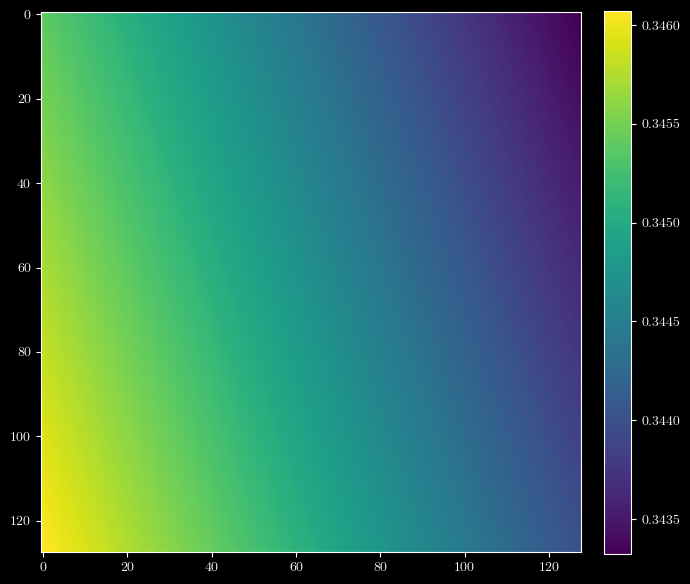

In [37]:
E, nu = 200, 0.28
G = E / (2 * (1 + nu))
b = 1
D = G * b / (2 * np.pi * (1 - nu))
xg = np.linspace(5., 5.01, 128)
dx = xg[1] - xg[0]
x,y = np.meshgrid(xg, xg, indexing='ij')
sigma_xx = -D * y * (3 * x**2 + y**2) / (x**2 + y**2) ** 2
sigma_yy = D * y * (x**2 - y**2) / (x**2 + y**2) ** 2
sigma_xy = D * x * (x**2 - y**2) / (x**2 + y**2) ** 2
sigma_zz = nu * (sigma_xx + sigma_yy)

dgx = np.gradient(sigma_xx, dx, axis=0)
dgy = np.gradient(sigma_xy, dx, axis=1)
divx = dgx + dgy

rerr1 = divx / np.abs(dgx)
rerr2 = divx / np.abs(dgy)
rerr = np.zeros((*rerr1.shape, 2))
rerr[...,0] = rerr1
rerr[...,1] = rerr2
rerr = np.max(np.abs(rerr), axis=-1)
print(np.abs(rerr[1:-1,1:-1]).max())

plt.style.use('dark_background')
fig, ax = plt.subplots(1, 1, figsize=(7,7))
im = ax.imshow(dgx)
fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
plt.tight_layout()
plt.show()

In [ ]:
x_d, y_d, b, nu, E = sympy.symbols("x_d y_d b nu E")

u_x = (b / (2 * sympy.pi)) * (
    sympy.atan(y_d / x_d) + ((x_d * y_d) / (2 * (1 - nu) * (x_d**2 + y_d**2)))
)

u_y = -(b / (2 * sympy.pi)) * (
    ((1 - 2 * nu) / (4 * (1 - nu))) * sympy.ln(x_d**2 + y_d**2)
    + ((x_d**2 - y_d**2) / (4 * (1 - nu) * (x_d**2 + y_d**2)))
)


dux_dx = sympy.Derivative(u_x, x_d).simplify().simplify().simplify()
duy_dy = sympy.Derivative(u_y, y_d).simplify().simplify().simplify()
dux_dy = sympy.Derivative(u_x, y_d).simplify().simplify().simplify()
duy_dx = sympy.Derivative(u_y, x_d).simplify().simplify().simplify()


dux_dx = (dux_dx / (b) * 4 * sympy.pi * (1 - nu) * (x_d**2 + y_d**2) ** 2).simplify()
dux_dy = (dux_dy / (b) * 4 * sympy.pi * (1 - nu) * (x_d**2 + y_d**2) ** 2).simplify()
duy_dx = (duy_dx / (b) * 4 * sympy.pi * (1 - nu) * (x_d**2 + y_d**2) ** 2).simplify()
duy_dy = (duy_dy / (b) * 4 * sympy.pi * (1 - nu) * (x_d**2 + y_d**2) ** 2).simplify()
display(dux_dx)
display(dux_dy)
display(duy_dx)
display(duy_dy)

dux_dx *= (b) / (4 * sympy.pi * (1 - nu) * (x_d**2 + y_d**2) ** 2)
dux_dy *= (b) / (4 * sympy.pi * (1 - nu) * (x_d**2 + y_d**2) ** 2)
duy_dx *= (b) / (4 * sympy.pi * (1 - nu) * (x_d**2 + y_d**2) ** 2)
duy_dy *= (b) / (4 * sympy.pi * (1 - nu) * (x_d**2 + y_d**2) ** 2)

display(dux_dx)
display(dux_dy)
display(duy_dx)
display(duy_dy)


y_d*(2*nu*x_d**2 + 2*nu*y_d**2 - 3*x_d**2 - y_d**2)

x_d*(-2*nu*x_d**2 - 2*nu*y_d**2 + 3*x_d**2 + y_d**2)

x_d*(2*nu*x_d**2 + 2*nu*y_d**2 - x_d**2 - 3*y_d**2)

y_d*(2*nu*x_d**2 + 2*nu*y_d**2 + x_d**2 - y_d**2)

b*y_d*(2*nu*x_d**2 + 2*nu*y_d**2 - 3*x_d**2 - y_d**2)/(4*pi*(1 - nu)*(x_d**2 + y_d**2)**2)

b*x_d*(-2*nu*x_d**2 - 2*nu*y_d**2 + 3*x_d**2 + y_d**2)/(4*pi*(1 - nu)*(x_d**2 + y_d**2)**2)

b*x_d*(2*nu*x_d**2 + 2*nu*y_d**2 - x_d**2 - 3*y_d**2)/(4*pi*(1 - nu)*(x_d**2 + y_d**2)**2)

b*y_d*(2*nu*x_d**2 + 2*nu*y_d**2 + x_d**2 - y_d**2)/(4*pi*(1 - nu)*(x_d**2 + y_d**2)**2)

In [250]:
D = (E / ((1 + nu) * (1 - 2 * nu))) * sympy.Matrix(
    [
        [1 - nu, nu, nu, 0, 0, 0],
        [nu, 1 - nu, nu, 0, 0, 0],
        [nu, nu, 1 - nu, 0, 0, 0],
        [0, 0, 0, (1 - 2 * nu) / 2, 0, 0],
        [0, 0, 0, 0, (1 - 2 * nu) / 2, 0],
        [0, 0, 0, 0, 0, (1 - 2 * nu) / 2],
    ]
)

lyx = -b * x_d / (4 * sympy.pi * (1 - nu) * (x_d**2 + y_d**2) ** 2)
duy_dx_p = lyx * (x_d**2 + 3 * y_d**2 - 2 * nu * (x_d**2 + y_d**2))

lxy = +b * x_d / (4 * sympy.pi * (1 - nu) * (x_d**2 + y_d**2) ** 2)
dux_dy_p = lxy * (3 * x_d**2 + y_d**2 - 2 * nu * (x_d**2 + y_d**2))

lxx = -b * y_d / (4 * sympy.pi * (1 - nu) * (x_d**2 + y_d**2) ** 2)
dux_dx_p = lxx * (3 * x_d**2 + y_d**2 - 2 * nu * (x_d**2 + y_d**2))

lyy = +b * y_d / (4 * sympy.pi * (1 - nu) * (x_d**2 + y_d**2) ** 2)
# duy_dy_p = lyy * (x_d**2 - y_d**2 - 2*nu*(x_d**2 + y_d**2))
duy_dy_p = lyy * (x_d**2 - y_d**2 + 2 * nu * (x_d**2 + y_d**2))
# NOTE: THE SIGN OF THE LAST TERM IS WRONG IN THE PAPER!

# display(sympy.simplify(duy_dx_p - duy_dx))
# display(sympy.simplify(dux_dy_p - dux_dy))
# display(sympy.simplify(dux_dx_p - dux_dx))
# display(sympy.simplify(duy_dy_p - duy_dy))

G = E / (2 * (1 + nu))
Ds = G * b / (2 * sympy.pi * (1 - nu))

eps_xx = sympy.simplify(dux_dx)
eps_yy = sympy.simplify(duy_dy)
eps_xy = sympy.simplify((dux_dy + duy_dx) / 2).simplify()
s_xx = sympy.simplify((D[0, 0] * eps_xx + D[0, 1] * eps_yy) / Ds)
s_yy = sympy.simplify((D[1, 0] * eps_xx + D[1, 1] * eps_yy) / Ds)
s_zz = sympy.simplify((D[2, 0] * eps_xx + D[2, 1] * eps_yy) / Ds)

s_xy = sympy.simplify(2 * D[3, 3] * eps_xy / Ds)

eps_xx_p = sympy.simplify(dux_dx_p)
eps_yy_p = sympy.simplify(duy_dy_p)
eps_xy_p = sympy.simplify((dux_dy_p + duy_dx_p) / 2).simplify()
s_xx_p = sympy.simplify((D[0, 0] * eps_xx_p + D[0, 1] * eps_yy_p) / Ds)
s_yy_p = sympy.simplify((D[1, 0] * eps_xx_p + D[1, 1] * eps_yy_p) / Ds)
s_zz_p = sympy.simplify((D[2, 0] * eps_xx_p + D[2, 1] * eps_yy_p) / Ds)

s_xy_p = sympy.simplify(2 * D[3, 3] * eps_xy_p / Ds)

display(s_xy_p)
display(s_xy)

display(sympy.simplify(s_zz - nu * (s_xx + s_yy)))
display(sympy.simplify(s_zz_p - nu * (s_xx_p + s_yy_p)))


x_d*(x_d**2 - y_d**2)/(x_d**2 + y_d**2)**2

x_d*(x_d**2 - y_d**2)/(x_d**2 + y_d**2)**2

0

0

Verified to give same (div free) stress solutions as found here: https://www.tf.uni-kiel.de/matwis/amat/def_en/kap_5/backbone/r5_2_2.html


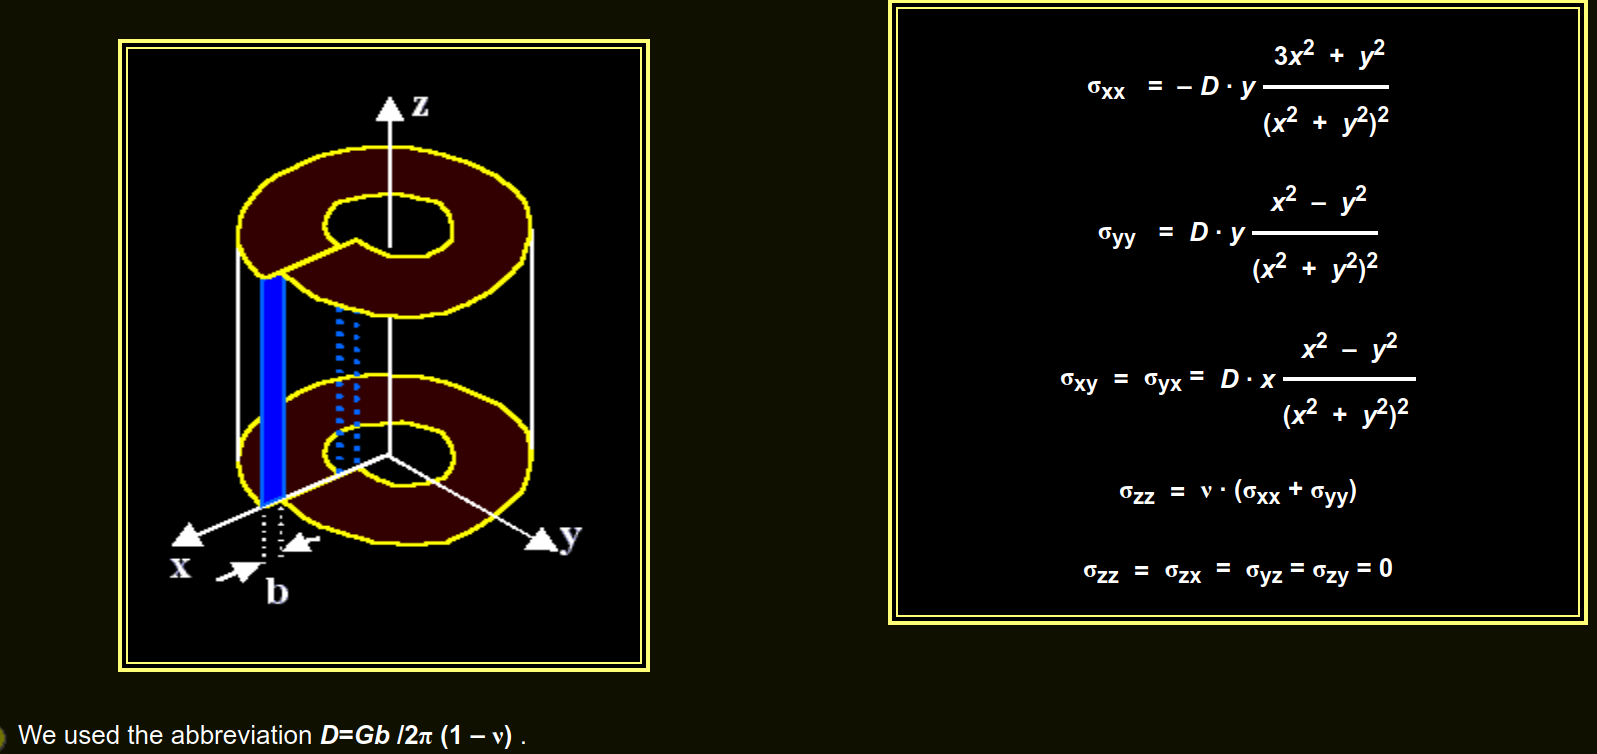

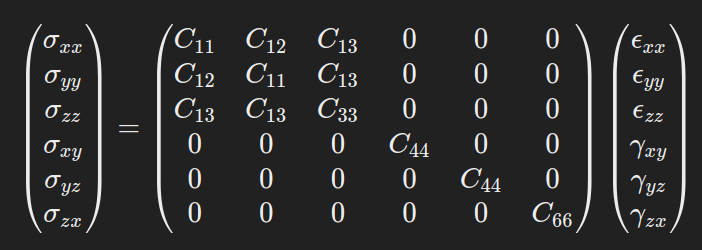

In [252]:
# Define the variables
x, y, z, D, nu = sympy.symbols("x y z D nu")

# from https://www.tf.uni-kiel.de/matwis/amat/def_en/kap_5/backbone/r5_2_2.html
sigma_xx = -D * y * (3 * x**2 + y**2) / (x**2 + y**2) ** 2
sigma_yy = D * y * (x**2 - y**2) / (x**2 + y**2) ** 2
sigma_xy = D * x * (x**2 - y**2) / (x**2 + y**2) ** 2
sigma_zz = nu * (sigma_xx + sigma_yy)


def divergence(tensor, x):
    out = [0, 0, 0]
    for i, vec in enumerate(tensor.T):
        for fi, xi in zip(vec, x):
            out[i] += fi.diff(xi) if isinstance(fi, sympy.Expr) else 0
        out[i] = sympy.simplify(out[i])
    return out


stress_tensor = np.array(
    [
        [sigma_xx, sigma_xy, 0],
        [sigma_xy, sigma_yy, 0],
        [0, 0, sigma_zz],
    ]
)

div = divergence(stress_tensor, [x, y, z])
div

[0, 0, 0]

2.0187129597393216e-06

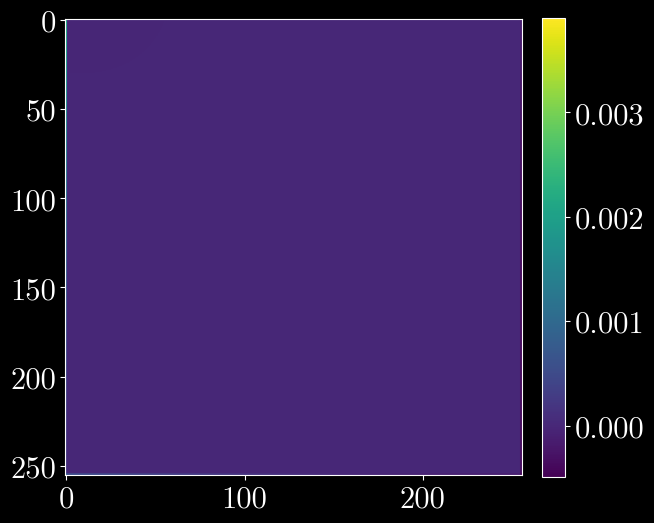

In [255]:

stress_tensor = np.array(
    [
        [s_xx_p, s_xy_p, 0],
        [s_xy_p, s_yy_p, 0],
        [0, 0, s_zz_p],
    ]
)

div = divergence(stress_tensor, [x, y, z])
div

[0, 0, 0]

In [256]:

stress_tensor = np.array(
    [
        [s_xx, s_xy, 0],
        [s_xy, s_yy, 0],
        [0, 0, s_zz],
    ]
)

div = divergence(stress_tensor, [x, y, z])
div

[0, 0, 0]